## Setting up data & importing required packages

In [1]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat
import math

## Reading diabetes data

In [2]:
housing = pd.read_csv('./kc_house_data.csv')
pd.set_option('precision', 2) #Setting dataframe precision
pd.set_option('display.max_rows', 10000) #Setting max rows to display

housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## Scatter Plot of Housing Data

In [3]:
def show_scatter_plot(title, x_label, y_label, x_values, y_values):
    plt.scatter(x_values, y_values)
    plt.title(title)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.show()


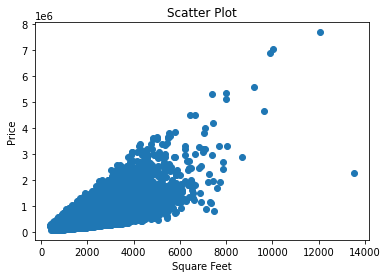

In [4]:
xs = housing.sqft_living
ys = housing.price

show_scatter_plot('Scatter Plot', 'Price', 'Square Feet', xs, ys)


## Regression Line

In [5]:
def calculate_slope_intercept(x_values, y_values):
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    return m, b  # slope and intercept

In [6]:
def show_least_squares_line(title, x_label, y_label, x_values, y_values):
    # First show the scatter plot.
    plt.scatter(x_values, y_values)
    
    # Now show the least squares line.
    m, b = calculate_slope_intercept(x_values, y_values) # Calling function to get y intercept & slope
    reg_line = [m*x + b for x in x_values]  # regression line
    plt.plot(xs, reg_line, color='red')

    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.ylabel(x_label)
    plt.xlabel(y_label)

    plt.show()

## Plotting Regression Line

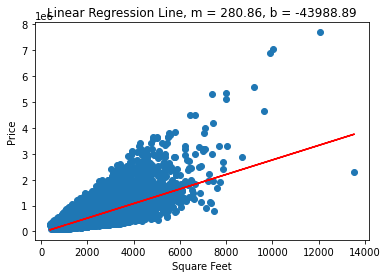

In [7]:
xs = housing.sqft_living
ys = housing.price

show_least_squares_line('Linear Regression Line', 'Price', 'Square Feet', xs, ys)

## Co-efficient of Determination


In [8]:
def calculate_ss(x_values, y_values):
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    ss_residual = sum_yy - b*sum_y - m*sum_xy
    ss_total    = sum_yy - (sum_y*sum_y)/n
    
    return ss_residual, ss_total

In [9]:
def calculate_r2(ss_residual, ss_total):
    cofd = 1 - ss_residual/ss_total
    return cofd

#### Priting SS_Residual, SS_Total & Coefficient of determination

In [10]:
ss_residual, ss_total = calculate_ss(xs, ys)

print(f'ss_residual = {ss_residual:8.5f}')
print(f'ss_total    = {ss_total:8.5f}')

ss_residual = 1478602783996836.00000
ss_total    = 2914582130408202.00000


#### Coefficient of determination (r^2)

In [11]:
r2 = calculate_r2(ss_residual, ss_total)

print(f'coefficient of determination = {r2:.3f}')

coefficient of determination = 0.493


## Coefficient of Corelation

In [12]:
def calculate_r(x_values, y_values):  # Defining calculate_r function but can also use previously calculated r^2 value to calculate r
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = math.sqrt(sum_xx - (sum_x*sum_x)/n)*math.sqrt(sum_yy - (sum_y*sum_y)/n)
    
    r = numerator/denominator
    return r

#### Corelation Coefficient

In [13]:
r = calculate_r(xs, ys)

print(f'r = {r:.3f}')

r = 0.702


# Analysis